## 참고: 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = '미적분관계1.jpg' STYLE='width 100px;'>
<img src = '미적분관계3.jpg' STYLE='width 100px;'>


C:\Users\NEW\AppData\Local\Temp\ipykernel_21300\3421472858.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(x), 'b-', lw = 1, c = 'k')
C:\Users\NEW\AppData\Local\Temp\ipykernel_21300\3421472858.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, g(x), 'b-', lw = 1, c = 'b')


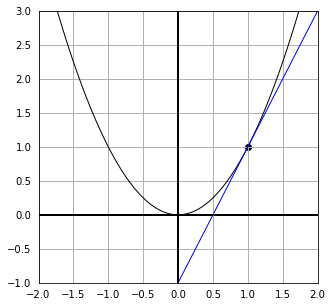

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return(x**2)

def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize = (5,5))

plt.scatter([1],[1],c = 'k')
plt.plot(x, f(x), 'b-', lw = 1, c = 'k')
plt.plot(x, g(x), 'b-', lw = 1, c = 'b')
plt.plot([x.min(), x.max()], [0, 0], lw = 2, c = 'k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw = 2, c = 'k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw = 1)

# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


C:\Users\NEW\AppData\Local\Temp\ipykernel_21300\4251504804.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, g(x), 'b-', lw = 1, c = 'b')


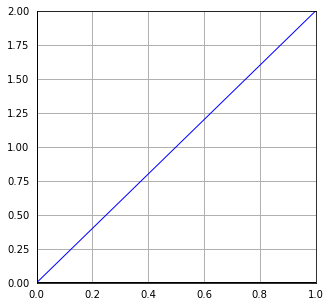

In [7]:
def g(x):
    return(2*x) 

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize = (5,5))

plt.plot(x, g(x), 'b-', lw = 1, c = 'b')
plt.plot([x.min(), x.max()], [0, 0], lw = 2, c = 'k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw = 2, c = 'k')
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.grid(lw = 1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color = 'white')
plt.show()


## 연속형 확률변수

- 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의 됨
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 됨
- 확률은 <b>확률밀도함수</b>, 또는 <b>밀도함수</b>라고 부르는 f(x)에 의해 정의됨
   
   P(x0 <= X <= x1) =  ∫ f(x)dx
- integrate.quad(f(x), x0, x1)함수 사용


-  SciPy의 integral 모듈을 사용하여 구현함


- 확률은 다음을 만족해야함
    - f(x) >= 0
    - ∫ f(x)dx = 1            
            - integrate.quad(f(x),- np.inf, np.inf)[0]

### 1차원 연속형 확률변수

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings

# warnings.filterwarnings('ignore', category = integrate.IntegrationWarning)
warnings.filterwarnings('ignore')

%precision 3
%matplotlib inline

#### 확률변수, 확률밀도함수 구하기

In [9]:
# 구간 정하기
x_range = np.array([0,1])

# 밀도함수 지정
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
  

# 확률분포: 구간과 확률변수
X = [x_range, f]   

#### 확률 구하기

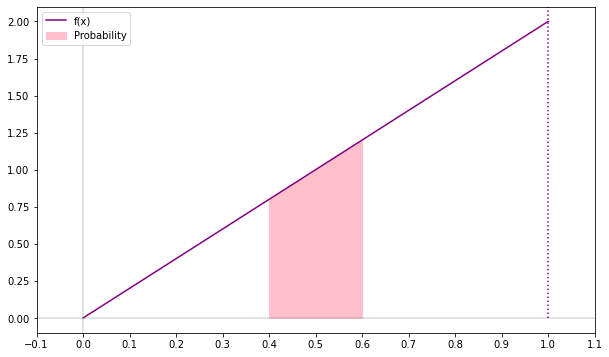

In [10]:
# 1.면적 넓이로 확률 구하기


## 시각화
xs = np.linspace(x_range[0], x_range[1], 100)
ys = [f(x) for x in xs]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, ys, label = 'f(x)', color = 'purple')
ax.hlines(0, -0.1 , 1.1, color = 'gray', alpha = 0.3)     # y = 0
ax.vlines(0, -0.1 , 2.1, color = 'gray', alpha = 0.3)     # x = 0
ax.vlines(xs.max(), 0, 2.1, linestyle = ':', color = 'purple')   # x = xs.max()


# 0.4 ~ 0.6까지 x좌표 준비
xs = np.linspace(0.4, 0.6, 100)
ys = [f(x) for x in xs]

# xs의 범위로 f(X)와 x축으로 둘러싸인 영역에 색 지정
ax.fill_between(xs, ys, color = 'pink', label = 'Probability')

ax.set_xticks(np.arange(-0.2, 1.3,0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,2.1)
ax.legend()

plt.show()

In [11]:
# 확률 구하기
# 2. integrate quad 함수를 이용하여 구하기

q_uad = integrate.quad(f, 0.4, 0.6)

print(f'적분값(확률) : {q_uad[0]:.3f}')
print(f'추정오차 : {q_uad[1]:.3f}')

적분값(확률) : 0.200
추정오차 : 0.000


#### 확률의 성질 만족하는지 확인

1. f(X) >=0

    - minimize_scaler 함수 사용: 함수의 최솟값을 구해주는 함수

In [12]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun

0

2. ∫f(X)dx = 1
    - [-∞,∞] 밀도함수 구하기

In [13]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

#### 누적분포함수
- 확률변수 X가 x 이하가 될 때의 확률을 반환하는 함수
- F(x) = P(X <= x) = ∫ f(x)dx,  [x, -∞]
- 분포함수 F(x)를 그리면, 반드시 단조증가함수가 됨

In [14]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

def F(x):
    return integrate.quad(f, -np.inf, x)[0]

F(0.6) - F(0.4)

0.200

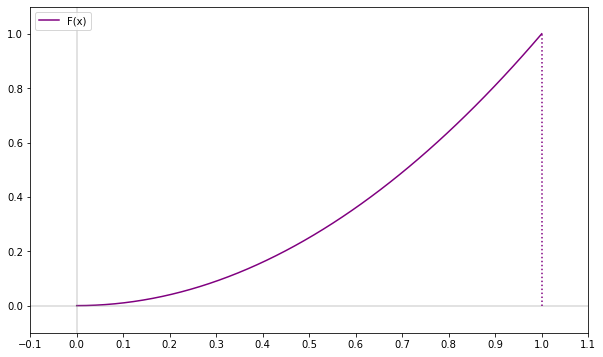

In [15]:
# 누적분포함수 시각화

x_range = [0,1]

xs = np.linspace(x_range[0], x_range[1])
ys = [F(x) for x in xs]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, ys, label = 'F(x)', color = 'purple')
ax.hlines(0, -0.1, 1.1, color = 'gray', alpha = 0.3)
ax.vlines(0, -0.1, 1.1, color = 'gray', alpha = 0.3)
ax.vlines(xs.max(), 0, 1.0, color = 'purple', linestyle = ':')


ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend(loc = 'upper left')

plt.show()

#### 확률변수의 변환

- Y = 2X + 3
- Y의 밀도함수를 g(y)라 했을 때, g(y)는 다음과 같음

     g(y) = (y-3)/2 (3 <= y <= 5)  
     
         =  0      (otherwise)
- 누적분포함수 G(y)는

    G(y) = P(Y<=y) = ∫g(y)dy


In [16]:
# 구간 정하기
y_range = [3,5]


# y의 밀도함수 구하기
def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0


# y의 누적분포함수 구하기
def G(y):
    return integrate.quad(g, -np.inf, y)[0]


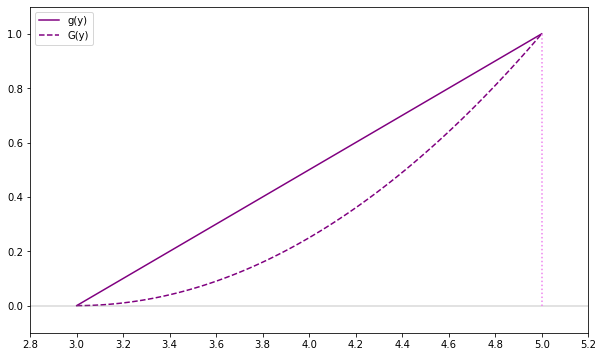

In [17]:
# 밀도함수, 분포함수, 시각화

xs = np.linspace(y_range[0], y_range[1], 100)
ys1 = [g(x) for x in xs]
ys2 = [G(x) for x in xs]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, ys1, label = 'g(y)', color = 'purple')
ax.plot(xs, ys2, label = 'G(y)', color = 'purple', linestyle = '--')
ax.hlines(0, 2.8, 5.2, color = 'gray', alpha = 0.3)
ax.vlines(xs.max(), 0, 1, color = 'violet', linestyle = ':')

ax.set_xticks(np.arange(2.8, 5.2,0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1,1.1)
ax.legend()

plt.show()

#### 기댓값
- E(X) = ∫ xf(x) dx

In [18]:
x_range = [0,1]

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0
    
X = [x_range, f]

In [19]:
#기댓값 구하기

def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [20]:
# 기댓값 구하는 사용자함수 만들기

def E(X, g = lambda x: x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X)

0.667

- E(Y) = E(2X+3) = ∫ (2x+3)*f(x) dx

In [21]:
# 기댓값 구하는 사용자함수 만들기

def E(X, g = lambda x: x):
    x_range, f = X
    
    def integrand(x):
        return g(x) * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


# 변환된 확률변수의 기댓값
E(X, g = lambda x:2*x + 3)

4.333

In [22]:
# E(2X + 3) = 2*E(X) + 3

2* E(X) + 3

4.333

#### 분산
- V(X) = ∫ (x - EX)^2 *  f(x) dx

In [23]:
# 기댓값 계산
mean = E(X)


#분산 구하기
def integrand(x):
    return (x - mean)**2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [24]:
# 분산 만드는 사용자함수 생성

def V(X, g = lambda x: x):
    x_range, f = X
    mean = E(X, g)
    
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]

V(X)

0.056

- V(X) = V(2X+3) = ∫ ((2x+3) - EX)^2 * f(x) dx

In [25]:
# 분산 만드는 사용자함수 생성

def V(X, g = lambda x: x):
    x_range, f = X
    mean = E(X, g)
    
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    
    return integrate.quad(integrand, -np.inf, np.inf)[0]


# 변환된 확률변수의 분산 구하기
V(X, g = lambda x: 2*x + 3)

0.222

In [26]:
# 확인: V(2X + 3) = 4V(X)

4*V(X)

0.222

### 2차원 연속형 확률변수

#### 2차원 연속형 확률변수의 정의

##### 결합확률밀도함수

In [62]:
x_range = [0,2]
x_range = [0,1]

def f_xy(x,y):
    if 0 <= y <= 1 and 0 <= x-y <= 1:
        return 4 * y * (x-y)
    else:
        return 0
    
XY = [x_range, x_range, f_xy]

ValueError: too many values to unpack (expected 2)

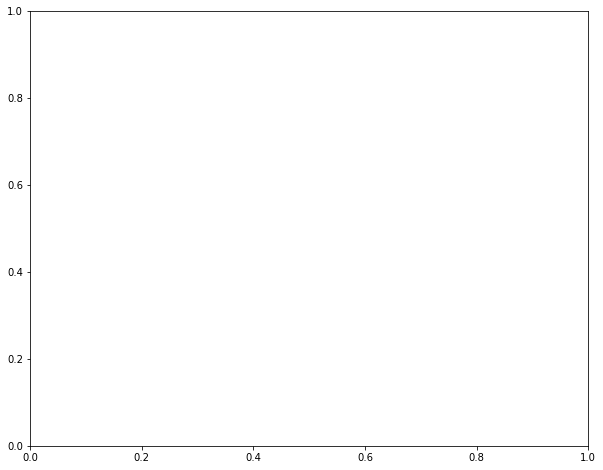

In [60]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[[f_xy(x,y) for y in ys] for x in xs]])

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3), minor = False)
ax.set_yticks(np.linspace(0,200,3), minor = False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
# ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax)

plt.show()

In [63]:
# 파이썬 버전에 따라 답이 안나옴, 원래 1.000이 나와야 정상!!!!!


integrate.nquad(f_xy, [[-np.inf, np.inf],[-np.inf, np.inf]])[0]

1.326

##### 주변확률밀도함수

In [64]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]

def f_Y(y):
    return integrate.quad(partial(f_xy, y = y), -np.inf, np.inf)[0]

In [65]:
X = [x_range, f_X]
Y = [y_range, f_Y]

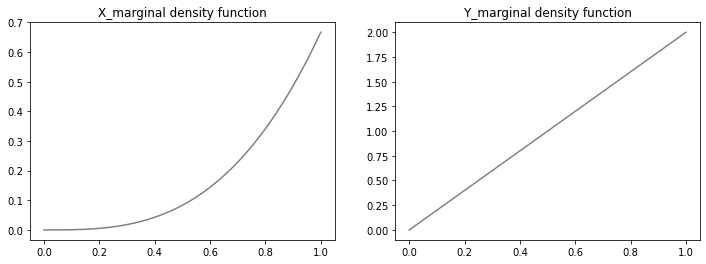

In [66]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt. figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xs, [f_X(x) for x in xs], color = 'gray')
ax2.plot(ys, [f_Y(y) for y in ys], color = 'gray')

ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### 2차원 연속형 확률변수의 지표

## 대표적인 연속형 확률분포

확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)

참고: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3

'%.3f'

In [1]:
linestyles = ['-','--',':']

def E(X, g = lambda x: x):
    x_range, f = X

    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]


def V(X, g = lambda x: x):
    x_range, f = X
    mean = E(X, g)
    
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(x):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'Density Function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'Sum of probability is {prob_sum}'
    
    print(f'expected value: { E(X):.3f}')
    print(f'variance: {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label = 'f(x)', color = 'gray')
    ax.plot(xs, [F(x) for x in xs], label = 'F(x)', color = 'gray', linestyle = '--')
    
    ax.legend()
    plt.show()

### 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두가지이다. $N(\mu,\sigma^2)$으로 표기

    X ~ N(μ, σ2)

- 정규분포변수에 평균을 빼주고, 표준편차로 나누어주면 표준정규분포를 따르게됨
    
    Z = (X - μ)/σ ~ N(0,1)
    
    
    
- 정규분포의 밀도 함수
<img src = '정규분포.jpg' STYLE='width 200px;'>



##### 사용자함수 생성

In [88]:
# 정규분포 밀도함수 반환 함수 생성

def Norm(mu, sigma):
    x_range = [-np.inf, np.inf]
    
    def f(x):
        return 1/np.sqrt(2 * np.pi * sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    
    return x_range, f

In [89]:
mu, sigma = 2, 0.5
X = Norm(mu, sigma)

check_prob(X)

expected value: 2.000
variance: 0.250


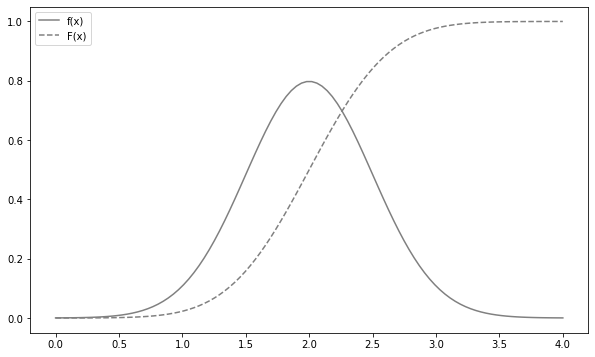

In [90]:
# 시각화

plot_prob(X, 0, 4)

##### scyipy.stats 함수 사용

In [95]:
import scipy.stats 

rv = stats.norm(2, 0.5)

# 정규분포의 기댓값, 분산
print(f'기댓값: {rv.mean()}')
print(f'분산:  {rv.var()}')

기댓값: 2.0
분산:  0.25


In [96]:
# 확률변수 X 값이 2일 때 확률밀도함수

rv.pdf(2)

0.798

In [98]:
# 확률변수 X 값이 2일 때 누적분포함수

rv.cdf(1.7)

0.274

In [101]:
# 상위 100α% 구하기
# P(X >= x) = α를 만족하는 x값 구하기
# 정규분포에서 칠해진 면적이 α인 x값 구하기

rv.isf(0.3), rv.isf(0.01)

(2.262, 3.163)

In [110]:
# P(x1 <= X <= x2) = α를 만족하는 x1,x2 값 구하기
# 양 옆을 제외한 가운데 부분의 칠해진 면적이 α인 x1,x2값 구하기

#방법1: inteval메서드 활용
print(rv.interval(0.9))

#방법2: isf 메서드로 빼기
print(rv.isf(0.95) , rv.isf(0.05))

(1.1775731865242636, 2.822426813475736)
1.1775731865242638 2.8224268134757367


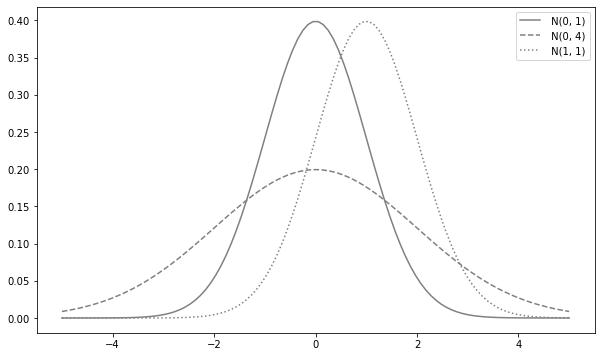

In [114]:
# 시각화하기
linestyles = ['-','--',':']

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]

for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs), label = f' N({mu}, {sigma**2})', ls = ls, color = 'gray')

ax.legend()

plt.show()

#### 과제: 정규분포 곡선 그리기

x :1-7.1, 평균 4, 표준편차 0.8인 정규분포 곡선 출력

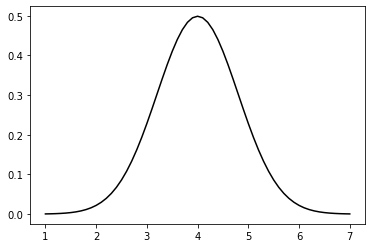

In [116]:
x_plot = np.arange(1,7.1, 0.1)

plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8), color = 'black')

#### 과제1: 정규분포 누적분포함수 그리기

- x :1-7.1, 평균 4, 표준편차 0.8인 정규분포 곡선 출력

In [6]:
import scipy.stats 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

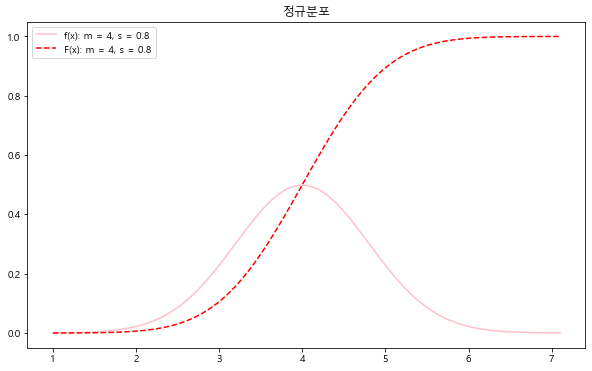

In [7]:
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False     # 마이너스 부호 깨짐 방지

rv = scipy.stats.norm(4, 0.8)

xs = np.linspace(1, 7.1, 100)
ys = rv.pdf(xs)
ys2 = rv.cdf(xs)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, ys, color = 'pink', label = 'f(x): m = 4, s = 0.8')
ax.plot(xs, ys2, color = 'red',label = 'F(x): m = 4, s = 0.8', linestyle = '--')
ax.set_title('정규분포')
ax.legend()

plt.show()

- 확률변수가 4일때 누적분포값(확률)

In [159]:
rv.cdf(4)

0.500

- 확률이 0.5일 때 확률변수

In [160]:
rv.isf(0.5)

4.000

#### 과제2: 정규분포 사례
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

In [161]:
import scipy.stats

In [163]:
# X ~ N(11,4^2), P(x>=14)?

rv = stats.norm(11,4)

1 - rv.cdf(14)

0.227

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

In [164]:
# X ~ N(800,30^2), P(x<=760)?

rv = stats.norm(800,30)

rv.cdf(760)

0.091

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오

In [165]:
# X ~ N(70,8^2), P(80<=X<=90)?

rv = stats.norm(70,8)

rv.cdf(90) - rv.cdf(80)

0.099

### 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포
- 간격이라는 시간이 따르는 분포이므로, 확률변수가 취할 수 있는 값은 0이상의 실수임


- X ~ Ex(λ)

- 지수분포의 밀도함수
    
    단위시간당 평균 λ번 발생하는 사건의 발생간격을 따르는 확률분포

     f(x) = λe^(-λx) (x>=0)
          = 0        (otherwise)
          
     ex)하루당 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 간격일때,
        교통사고가 일어난 뒤 다음 교통사고가 일어날 때까지의 시간은 Ex(2)를 따른다고 할 수 있음
        
        교통사고가 일어난 뒤 3일 이내 또 교통사고가 일어날 확률:
              P(x<=3) = ∫ 2e^(-2x)dx ~ 0.998
              
     ex2)1시간당 평균 10번 액세스하는 사이트에 대한 액세스 간격
         사이트에 대한 액세스를 완전한 임의의 사건으로 인식하면, 액세스 간격은 Ex(10)을 따름
         
         이 사이트에 대한 액세스가 있은 뒤 1분 이내에 또 애게슷할 확률
             P(x<=1/60) = ∫ 10e^(-10x)dx ~ 0.154
             
- E(X) = 1/λ
- V(X) = 1/λ^2

##### 사용자함수 생성

In [120]:
def Ex(lam):
    x_range = [0, np.inf]
    
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
        
    return x_range, f

In [121]:
lam = 3
X = Ex(lam)

check_prob(X)

expected value: 0.333
variance: 0.111


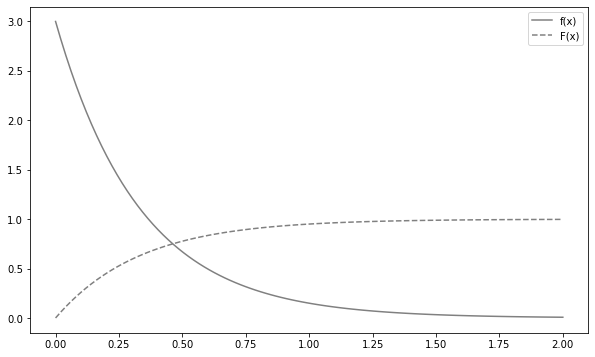

In [124]:
# 시각화

plot_prob(X, 0, 2)

##### scipy.stats 함수 사용

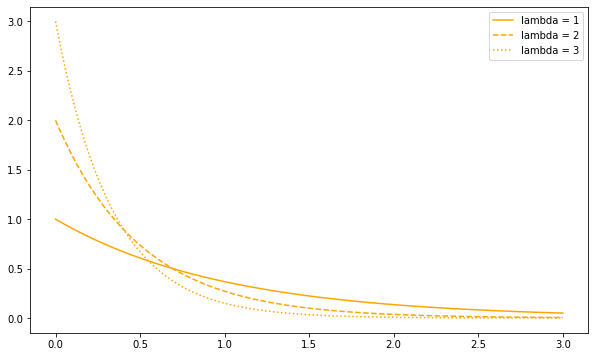

In [128]:
import scipy.stats

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale = 1/lam)
    ax.plot(xs, rv.pdf(xs), label = f'lambda = {lam}', ls = ls, color = 'orange')

ax.legend()

plt.show()

### 카이제곱분포

### t분포

### F분포